<a href="https://colab.research.google.com/github/Gitanjali1992/pandas/blob/main/Series_Methods_and_Handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Reading in Data with read.csv()

In [2]:
data_url = 'https://andybek.com/pandas-drinks'

In [3]:
pd.read_csv(data_url)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,NaN,NaN,NaN,NaN
1,Albania,89.0,132.0,54.0,4.9
2,Algeria,25.0,NaN,14.0,0.7
3,Andorra,245.0,138.0,312.0,12.4
4,Angola,217.0,57.0,45.0,5.9
...,...,...,...,...,...
188,Venezuela,333.0,1.0,3.0,7.7
189,Vietnam,111.0,2.0,1.0,2.0
190,Yemen,6.0,NaN,NaN,0.1
191,Zambia,32.0,19.0,4.0,2.5


In [4]:
# Extracting only selective columns from above returned data frame 
# by using parameters of read_csv: usecols
pd.read_csv(data_url, usecols = ['country', 'wine_servings'])

,country,wine_servings
0,Afghanistan,NaN
1,Albania,54.0
2,Algeria,14.0
3,Andorra,312.0
4,Angola,45.0
...,...,...
188,Venezuela,3.0
189,Vietnam,1.0
190,Yemen,NaN
191,Zambia,4.0


In [5]:
# making country as index of the series 
# by using parameters of read_csv: index_col
pd.read_csv(data_url, usecols = ['country', 'wine_servings'], index_col = 'country')

,wine_servings
country,
Afghanistan,NaN
Albania,54.0
Algeria,14.0
Andorra,312.0
Angola,45.0
...,...
Venezuela,3.0
Vietnam,1.0
Yemen,NaN


In [6]:
alcohol = pd.read_csv(data_url, usecols = ['country', 'wine_servings'], index_col = 'country')

In [7]:
alcohol

,wine_servings
country,
Afghanistan,NaN
Albania,54.0
Algeria,14.0
Andorra,312.0
Angola,45.0
...,...
Venezuela,3.0
Vietnam,1.0
Yemen,NaN


In [8]:
type(alcohol)

pandas.core.frame.DataFrame

In [9]:
# squeeze parameter i read_csv():
# if parsed data has only one column, it returns a series
alcohol = pd.read_csv(data_url, usecols = ['country', 'wine_servings'], index_col = 'country', squeeze = True)

In [10]:
type(alcohol)

pandas.core.series.Series

In [11]:
alcohol

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

# Series Sizing WIth .size , .shape And len()

In [12]:
alcohol.size

193

In [13]:
alcohol.values

array([ nan,  54.,  14., 312.,  45.,  45., 221.,  11., 212., 191.,   5.,
        51.,   7.,  nan,  36.,  42., 212.,   8.,  13.,  nan,   8.,   8.,
        35.,  16.,   1.,  94.,   7.,  nan,   7.,  16.,   1.,   4.,   1.,
         1.,   1., 172.,   8.,   3.,   1.,   9.,  74.,  11., 254.,   5.,
       113., 134.,  nan,   1., 278.,   3.,  26.,   9.,   3.,   1.,   2.,
       233.,  nan,  59.,  nan,   1.,  97.,  37.,  59.,   1., 149., 175.,
         1., 218.,  28.,   2.,   2.,  21.,   1.,   1.,   2., 185.,  78.,
        nan,  nan,  nan,  nan, 165.,   9., 237.,   9.,  16.,   1.,  12.,
         2.,   1.,  nan,   6., 123.,  62.,  31.,  nan,   2.,  nan,  56.,
       271.,   4.,   1.,  nan,  nan,   1.,  12.,  nan,  nan,  18.,   5.,
        18.,  nan,   8., 128.,   1.,   5.,  nan,   1.,   8.,  nan,  19.,
       175.,   1.,   1.,   2.,   7., 129.,   1.,  nan,  23.,  18.,   1.,
        74.,  21.,   1.,  56., 339.,   7.,   9.,  18., 167.,  73.,  nan,
        32.,  71.,  11.,  24.,  nan,  14.,  nan,   

In [14]:
alcohol.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

In [15]:
alcohol.values.size

193

In [16]:
alcohol.index.size

193

In [17]:
alcohol.values.size == alcohol.index.size

True

In [18]:
alcohol.shape

(193,)

In [19]:
alcohol.size == alcohol.shape[0]
# Length of sesries = First element of Tuple returned by .shape
# Series is one-dimensional, hence .shape returns tuple with only one value: (193,0)

True

# Unique Values and Series Monotonicity

Uniqueness

In [20]:
alcohol.is_unique

False

In [21]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [22]:
alcohol.head().is_unique

True

In [23]:
alcohol.head().nunique()
# Gives 1 less than true number of unique values bcoz it excludes names.

4

In [24]:
alcohol.head().nunique(dropna = False)

5

Monotonicity

In [25]:
pd.Series([1,2,3]).is_monotonic

True

In [26]:
pd.Series([1,2,3,3,3,3]).is_monotonic

True

In [27]:
pd.Series([1,2,3,3,3,3,4,74,100,189,1000]).is_monotonic

True

In [28]:
pd.Series([1,2,3,3,3,3,4,74,100,189,1000,9]).is_monotonic

False

In [29]:
pd.Series([1,2,3,3,3,3,4,74,100,189,1000,9,99, 100]).is_monotonic

False

In [30]:
pd.Series([1,2,3,3,3,3,4,74,100,189,1000]).is_monotonic_increasing
# .is_monotonic is an alias to .is_monotonic_increasing

True

In [31]:
pd.Series(reversed([1,2,3,3,3,3,4,74,100,189,1000])).is_monotonic

False

In [32]:
pd.Series(reversed([1,2,3,3,3,3,4,74,100,189,1000])).is_monotonic_increasing

False

In [33]:
pd.Series(reversed([1,2,3,3,3,3,4,74,100,189,1000])).is_monotonic_decreasing

True

# The count() Method

In [34]:
alcohol.count()
# Return the number of Non-NA/null values in series

162

In [35]:
alcohol.size
# Returns the number of values in series

193

In [36]:
alcohol.hasnans
# returns True if series has NA/null values

True

# Accessing and Counting NAs

Accessing Nulls in Series

In [37]:
alcohol.isnull()

country
Afghanistan     True
Albania        False
Algeria        False
Andorra        False
Angola         False
               ...  
Venezuela      False
Vietnam        False
Yemen           True
Zambia         False
Zimbabwe       False
Name: wine_servings, Length: 193, dtype: bool

In [38]:
alcohol[alcohol.isnull()]

country
Afghanistan        NaN
Bangladesh         NaN
Bhutan             NaN
Burundi            NaN
North Korea        NaN
Eritrea            NaN
Ethiopia           NaN
India              NaN
Indonesia          NaN
Iran               NaN
Iraq               NaN
Kuwait             NaN
Lesotho            NaN
Libya              NaN
Malaysia           NaN
Maldives           NaN
Marshall Islands   NaN
Mauritania         NaN
Monaco             NaN
Myanmar            NaN
Nepal              NaN
Pakistan           NaN
Rwanda             NaN
San Marino         NaN
Saudi Arabia       NaN
Somalia            NaN
Sri Lanka          NaN
Sudan              NaN
Tajikistan         NaN
Uganda             NaN
Yemen              NaN
Name: wine_servings, dtype: float64

In [39]:
alcohol[alcohol.isnull()].index

Index(['Afghanistan', 'Bangladesh', 'Bhutan', 'Burundi', 'North Korea',
       'Eritrea', 'Ethiopia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Kuwait',
       'Lesotho', 'Libya', 'Malaysia', 'Maldives', 'Marshall Islands',
       'Mauritania', 'Monaco', 'Myanmar', 'Nepal', 'Pakistan', 'Rwanda',
       'San Marino', 'Saudi Arabia', 'Somalia', 'Sri Lanka', 'Sudan',
       'Tajikistan', 'Uganda', 'Yemen'],
      dtype='object', name='country')

In [40]:
type(alcohol[alcohol.isnull()].index)

pandas.core.indexes.base.Index

In [41]:
list(alcohol[alcohol.isnull()].index)

['Afghanistan',
 'Bangladesh',
 'Bhutan',
 'Burundi',
 'North Korea',
 'Eritrea',
 'Ethiopia',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Kuwait',
 'Lesotho',
 'Libya',
 'Malaysia',
 'Maldives',
 'Marshall Islands',
 'Mauritania',
 'Monaco',
 'Myanmar',
 'Nepal',
 'Pakistan',
 'Rwanda',
 'San Marino',
 'Saudi Arabia',
 'Somalia',
 'Sri Lanka',
 'Sudan',
 'Tajikistan',
 'Uganda',
 'Yemen']

Counting Nulls in Series

In [42]:
len(list(alcohol[alcohol.isnull()].index))
# Cumbersome way

31

In [43]:
# Pandorable way
# Booleans are integers in Python: 
# True ~ 1
# False ~ 0
# .sum() simply performs arithmatic sum of booleans to sum of 0s and 1s
alcohol.isnull().sum()

31

In [44]:
sum([True, False, True])
#  sum(1,0,1)

2

In [45]:
all = alcohol.size
nonnulls = alcohol.count()
nulls = alcohol.isnull().sum()
all == nonnulls + nulls

True

In [46]:
alcohol.isna()
# .isnull() an alias to .isna()

country
Afghanistan     True
Albania        False
Algeria        False
Andorra        False
Angola         False
               ...  
Venezuela      False
Vietnam        False
Yemen           True
Zambia         False
Zimbabwe       False
Name: wine_servings, Length: 193, dtype: bool

# Bonus: Another Approach

In [47]:
ser = pd.Series(data = [True, False, None, 2], dtype = float)

In [48]:
ser

0    1.0
1    0.0
2    NaN
3    2.0
dtype: float64

In [49]:
np.isnan(ser)

0    False
1    False
2     True
3    False
dtype: bool

In [50]:
# can also pass numpy ufuncs as reference to series
alcohol[np.isnan]
# indexing by callables

country
Afghanistan        NaN
Bangladesh         NaN
Bhutan             NaN
Burundi            NaN
North Korea        NaN
Eritrea            NaN
Ethiopia           NaN
India              NaN
Indonesia          NaN
Iran               NaN
Iraq               NaN
Kuwait             NaN
Lesotho            NaN
Libya              NaN
Malaysia           NaN
Maldives           NaN
Marshall Islands   NaN
Mauritania         NaN
Monaco             NaN
Myanmar            NaN
Nepal              NaN
Pakistan           NaN
Rwanda             NaN
San Marino         NaN
Saudi Arabia       NaN
Somalia            NaN
Sri Lanka          NaN
Sudan              NaN
Tajikistan         NaN
Uganda             NaN
Yemen              NaN
Name: wine_servings, dtype: float64

In [51]:
alcohol[np.isnan].size

31

In [52]:
# alcohol[alcohol.isna()] ~ alcohol[np.isnan]
# both approacjes are same but numpy approach is more elegant

# The Other Side: notnull() And notna()

In [53]:
alcohol.notnull()

country
Afghanistan    False
Albania         True
Algeria         True
Andorra         True
Angola          True
               ...  
Venezuela       True
Vietnam         True
Yemen          False
Zambia          True
Zimbabwe        True
Name: wine_servings, Length: 193, dtype: bool

In [54]:
alcohol[alcohol.notnull()]
# equivalent to alcohol.loc[alcohol.notnull()]

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [55]:
alcohol.notnull().sum()
# equivalent to alcohol.count()

162

In [56]:
alcohol.notnull().sum() + alcohol.isnull().sum() == alcohol.size

True

In [57]:
# .notna() is alias to .notnull()
alcohol.notna().sum() + alcohol.isna().sum() == alcohol.size

True

# Bonus: Booleans are Literally Numbers in Python

bool type inherits from int
bool --> int --> Object

In [58]:
type(True)

bool

In [59]:
type(False)

bool

In [60]:
# Method resolution order
bool.__mro__

(bool, int, object)

In [61]:
True + 19

20

In [62]:
True + True - False + 3

5

# Skill Challenge

Isolate the not nulls in *alcohol* series and assign them to a variable *wine_servings*.

In [63]:
wine_servings = alcohol[alcohol.notnull()]
wine_servings

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

What is the total wine consumed by countries in *wine_servings*?


In [64]:
wine_servings.sum()

8221.0

In the wine_servings dataset, what was the total wine consumed by countries that consumed less than 100 servings?


In [65]:
filter_servings = wine_servings[lambda x: [True if i<100 else False for i in x]]

In [66]:
filter_servings.sum()

2416.0

Another approach to:

In the wine_servings dataset, what was the total wine consumed by countries that consumed less than 100 servings?


In [67]:
wine_servings < 100

country
Albania               True
Algeria               True
Andorra              False
Angola                True
Antigua & Barbuda     True
                     ...  
Vanuatu               True
Venezuela             True
Vietnam               True
Zambia                True
Zimbabwe              True
Name: wine_servings, Length: 162, dtype: bool

In [68]:
wine_servings[wine_servings < 100]

country
Albania              54.0
Algeria              14.0
Angola               45.0
Antigua & Barbuda    45.0
Armenia              11.0
                     ... 
Vanuatu              11.0
Venezuela             3.0
Vietnam               1.0
Zambia                4.0
Zimbabwe              4.0
Name: wine_servings, Length: 132, dtype: float64

In [69]:
wine_servings[wine_servings < 100].sum()

2416.0

# Dropping and Filling NAs

Drop NaNs

In [70]:
alcohol.dropna()

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [71]:
alcohol.dropna().size == alcohol.notnull().sum()

True

In [72]:
# Original series not altered:
alcohol

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

In [73]:
# one way to alter series is using Reassignment:
# alcohol = alcohol.dropna()

In [74]:
# Another way to use inplace param
# alcohol.dropna(inplace = True)
# By default inplace parameter is set to False
# So when we do:
# alcohol.dropna() ~ alcohol.dropna(inplace = False)

Fill NaNs

In [75]:
alcohol.fillna(100, inplace = False)
# this is equivalent to: alcohol.fillna(100)
# inplace param if set to True will alter the original series

country
Afghanistan    100.0
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen          100.0
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

# Descriptive Statistics

In [76]:
# Average
# alcohol.sum()/alcohol.count()
alcohol.mean()

50.74691358024691

In [77]:
# Median
alcohol.median()

11.5

In [78]:
# Median- Another way
# alcohol.quantile(q=.5) ~ alcohol.quantile(.5)
alcohol.quantile(.5)

11.5

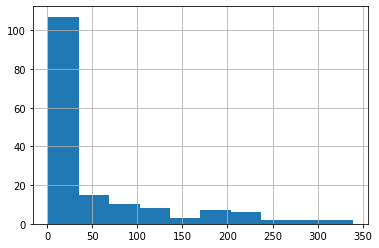

In [79]:
# Understanding skew via data visulization in Pandas:
alcohol.hist()

In [80]:
# iqr
iqr = alcohol.quantile(.75) - alcohol.quantile(.25)
iqr

58.25

In [81]:
# Min and Max
alcohol.min()

1.0

In [82]:
alcohol.max()

339.0

In [83]:
# Standard Deviation:
# is the square root of the variance
alcohol.std()

76.13491716376171

In [84]:
# Variance
alcohol.var()

5796.5256115328575

In [85]:
alcohol.std()**2 == alcohol.var()

True

# The describe() Method

In [86]:
alcohol.describe()
# Returns Pandas series containing descriptive statistics as data

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
25%        3.000000
50%       11.500000
75%       61.250000
max      339.000000
Name: wine_servings, dtype: float64

In [87]:
# percentiles parameter: To specify the percentiles we need:
alcohol.describe(percentiles=[.19, .79])

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
19%        2.000000
50%       11.500000
79%       81.570000
max      339.000000
Name: wine_servings, dtype: float64

In [88]:
# include and exclude parameters: To data based on data types
alcohol.describe(percentiles=[.19, .79], include = float, exclude = object)

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
19%        2.000000
50%       11.500000
79%       81.570000
max      339.000000
Name: wine_servings, dtype: float64

In [89]:
alcohol.dtype

dtype('float64')

# mode() And value_counts()

Mode

In [90]:
# mode
# returna a small series indicating the frequest-occurring element
alcohol.mode()

0    1.0
dtype: float64

Value counts

In [91]:
alcohol == 1

country
Afghanistan    False
Albania        False
Algeria        False
Andorra        False
Angola         False
               ...  
Venezuela      False
Vietnam         True
Yemen          False
Zambia         False
Zimbabwe       False
Name: wine_servings, Length: 193, dtype: bool

In [92]:
alcohol[alcohol == 1]

country
Brunei                      1.0
Cambodia                    1.0
Canada                      1.0
Central African Republic    1.0
Chad                        1.0
Comoros                     1.0
DR Congo                    1.0
Egypt                       1.0
Fiji                        1.0
Gambia                      1.0
Ghana                       1.0
Guyana                      1.0
Haiti                       1.0
Jordan                      1.0
Kiribati                    1.0
Malawi                      1.0
Mali                        1.0
Morocco                     1.0
Namibia                     1.0
Nicaragua                   1.0
Niger                       1.0
Oman                        1.0
Papua New Guinea            1.0
Philippines                 1.0
Solomon Islands             1.0
Thailand                    1.0
Tanzania                    1.0
Vietnam                     1.0
Name: wine_servings, dtype: float64

In [93]:
# Getting the frequency count of single specific value i.e. 1 here
alcohol[alcohol == 1].size

28

In [94]:
# Value counts:
# More comprehensive: Getting frequency count for all unique values in a series
alcohol.value_counts()

1.0      28
2.0      10
7.0       9
8.0       7
5.0       6
         ..
218.0     1
185.0     1
78.0      1
165.0     1
22.0      1
Name: wine_servings, Length: 71, dtype: int64

In [95]:
# More convenient
alcohol.value_counts().iloc[0]
# Equivalent to: alcohol[alcohol == 1].size

28

In [96]:
# get Normalized values --> i.e. relative frequencies of all unique values in series
# relative frequency calculated as: (frequency of value/ total number of non null values) i.e. 28/162
alcohol.value_counts(normalize = True)
# by default it is False and thus we get raw items as seem earlier: alcohol.value_counts(normalize = False)

1.0      0.172840
2.0      0.061728
7.0      0.055556
8.0      0.043210
5.0      0.037037
           ...   
218.0    0.006173
185.0    0.006173
78.0     0.006173
165.0    0.006173
22.0     0.006173
Name: wine_servings, Length: 71, dtype: float64

# idxmax() And idxmin()

In [97]:
# Find out the country label that had max wine_servings: 
alcohol.max()

339.0

In [98]:
# One approach: using boolean masks passed in indexing
alcohol[alcohol == alcohol.max()]
# returns a series containing country label and its value
# also contains series attributes characterizing the series

country
Portugal    339.0
Name: wine_servings, dtype: float64

In [99]:
alcohol[alcohol == alcohol.max()].index

Index(['Portugal'], dtype='object', name='country')

In [100]:
type(alcohol[alcohol == alcohol.max()].index)

pandas.core.indexes.base.Index

In [101]:
alcohol[alcohol == alcohol.max()].index[0]

'Portugal'

In [102]:
# Another approch: using idxmax()
# only fetch the country label which has max value
alcohol.idxmax()

'Portugal'

In [103]:
# only fetch the country label which has min value
alcohol.idxmin()

'Brunei'

In [104]:
# Be careful of the interpretation with these functions
# These functions always return the 1st label associated with max and min values
# example shown below

In [105]:
alcohol.min()

1.0

In [106]:
alcohol.value_counts().head(1)

1.0    28
Name: wine_servings, dtype: int64

In [107]:
alcohol[alcohol == alcohol.min()]
# there are 28 countries with min value as 1 but .idxmin() only gave Brunei (1st label associated with value 1)

country
Brunei                      1.0
Cambodia                    1.0
Canada                      1.0
Central African Republic    1.0
Chad                        1.0
Comoros                     1.0
DR Congo                    1.0
Egypt                       1.0
Fiji                        1.0
Gambia                      1.0
Ghana                       1.0
Guyana                      1.0
Haiti                       1.0
Jordan                      1.0
Kiribati                    1.0
Malawi                      1.0
Mali                        1.0
Morocco                     1.0
Namibia                     1.0
Nicaragua                   1.0
Niger                       1.0
Oman                        1.0
Papua New Guinea            1.0
Philippines                 1.0
Solomon Islands             1.0
Thailand                    1.0
Tanzania                    1.0
Vietnam                     1.0
Name: wine_servings, dtype: float64

In [108]:
# equivalence to be noted:
alcohol[alcohol.idxmax()] == alcohol['Portugal'] == alcohol.max()

True

# Sorting With sort_values()

Sorting by Values

In [109]:
alcohol.sort_values()
# By default Ascending order sorting
# ~ alcohol.sort_values(ascending = True)
# small --> higher --> NaNs

country
Thailand           1.0
Solomon Islands    1.0
Brunei             1.0
Haiti              1.0
Cambodia           1.0
                  ... 
Sri Lanka          NaN
Sudan              NaN
Tajikistan         NaN
Uganda             NaN
Yemen              NaN
Name: wine_servings, Length: 193, dtype: float64

In [110]:
# Setting ascending parameter to False to get descending order sorting
# By default: ascending = True
alcohol.sort_values(ascending = False)
# higher --> small --> NaNs

country
Portugal      339.0
Andorra       312.0
Denmark       278.0
Slovenia      276.0
Luxembourg    271.0
              ...  
Sri Lanka       NaN
Sudan           NaN
Tajikistan      NaN
Uganda          NaN
Yemen           NaN
Name: wine_servings, Length: 193, dtype: float64

In [111]:
# Moving NaNs: Using parameter: na_position
# Top --> na_position = 'first'
# Bottom (default) --> na_position = 'last'
# default setting: alcohol.sort_values(ascending = False, na_position = 'last') ~ alcohol.sort_values(ascending = False)
alcohol.sort_values(ascending = False, na_position = 'first')

country
Afghanistan                 NaN
Bangladesh                  NaN
Bhutan                      NaN
Burundi                     NaN
North Korea                 NaN
                           ... 
Jordan                      1.0
Solomon Islands             1.0
Central African Republic    1.0
Haiti                       1.0
Chad                        1.0
Name: wine_servings, Length: 193, dtype: float64

In [112]:
# Specifying Sorting Algorithm
# using parameter: kind
# default setting: alcohol.sort_values(ascending = False, na_position = 'last', kind = 'quicksort') ~ alcohol.sort_values(ascending = False, na_position = 'last')
# We also have other ooptions: heapsort, mergesort
alcohol.sort_values(ascending = False, na_position = 'last', kind = 'mergesort')

country
Portugal      339.0
Andorra       312.0
Denmark       278.0
Slovenia      276.0
Luxembourg    271.0
              ...  
Sri Lanka       NaN
Sudan           NaN
Tajikistan      NaN
Uganda          NaN
Yemen           NaN
Name: wine_servings, Length: 193, dtype: float64

In [113]:
# sort_values() returns a sorted copy of the series.
# It does not alter the original sderies. In order to achieve that we have two options:
# Option1: Re-assignment
#   alcohol = alcohol.sort_values(ascending = False, na_position = 'last', kind = 'quicksort')
# Option2: inplace parameter (by default- inplace = False)
#   alcohol.sort_values(ascending = False, na_position = 'last', kind = 'quicksort', inplace = True)

# nlargest() And nsmallest()

In [114]:
# Fetching top 10 countries with largest wine_servings than rest:
# two ways:

In [115]:
# One way:
alcohol.sort_values(ascending = False)[:10]

country
Portugal             339.0
Andorra              312.0
Denmark              278.0
Slovenia             276.0
Luxembourg           271.0
Croatia              254.0
Italy                237.0
Equatorial Guinea    233.0
Argentina            221.0
Greece               218.0
Name: wine_servings, dtype: float64

In [116]:
# Pandorable way:
alcohol.nlargest(n = 10)
# ~ alcohol.nlargest(10)

country
Portugal             339.0
Andorra              312.0
Denmark              278.0
Slovenia             276.0
Luxembourg           271.0
Croatia              254.0
Italy                237.0
Equatorial Guinea    233.0
Argentina            221.0
Greece               218.0
Name: wine_servings, dtype: float64

In [117]:
alcohol.sort_values(ascending = False)[:10] == alcohol.nlargest(n = 10)
# Both are equivalent

country
Portugal             True
Andorra              True
Denmark              True
Slovenia             True
Luxembourg           True
Croatia              True
Italy                True
Equatorial Guinea    True
Argentina            True
Greece               True
Name: wine_servings, dtype: bool

In [118]:
# To fetch the Smallest 20:
alcohol.nsmallest(n = 20)
# ~ alcohol.nsmallest(20)

country
Brunei                      1.0
Cambodia                    1.0
Canada                      1.0
Central African Republic    1.0
Chad                        1.0
Comoros                     1.0
DR Congo                    1.0
Egypt                       1.0
Fiji                        1.0
Gambia                      1.0
Ghana                       1.0
Guyana                      1.0
Haiti                       1.0
Jordan                      1.0
Kiribati                    1.0
Malawi                      1.0
Mali                        1.0
Morocco                     1.0
Namibia                     1.0
Nicaragua                   1.0
Name: wine_servings, dtype: float64

# Sorting With sort_index()

Sorting by Imdex labels

In [119]:
alcohol.sort_index()
# By default ascending order

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

In [120]:
# In Descending order:
alcohol.sort_index(ascending = False)

country
Zimbabwe         4.0
Zambia           4.0
Yemen            NaN
Vietnam          1.0
Venezuela        3.0
               ...  
Angola          45.0
Andorra        312.0
Algeria         14.0
Albania         54.0
Afghanistan      NaN
Name: wine_servings, Length: 193, dtype: float64

In [121]:
# Moving NaNs:
alcohol.sort_index(ascending = False, na_position = 'first')

country
Zimbabwe         4.0
Zambia           4.0
Yemen            NaN
Vietnam          1.0
Venezuela        3.0
               ...  
Angola          45.0
Andorra        312.0
Algeria         14.0
Albania         54.0
Afghanistan      NaN
Name: wine_servings, Length: 193, dtype: float64

In [122]:
# na_position not impacted our series as our index labels has no nulls:
alcohol.index.isnull().sum()

0

In [123]:
# sort_index() does not alter series in place, returns a copy instead
# to Alter original series:
# alcohol.sort_index(ascending = False, na_position = 'first', inplace = True)

# Skill Challenge

Step1: Select all the countries from alcohol that have more than 50 wine servings
and the corresponding values in a Variable *fifty_plus*.
 

In [124]:
fifty_plus = alcohol[alcohol > 50]
fifty_plus

country
Albania                54.0
Andorra               312.0
Argentina             221.0
Australia             212.0
Austria               191.0
Bahamas                51.0
Belgium               212.0
Bulgaria               94.0
Chile                 172.0
Cook Islands           74.0
Croatia               254.0
Cyprus                113.0
Czech Republic        134.0
Denmark               278.0
Equatorial Guinea     233.0
Estonia                59.0
Finland                97.0
Gabon                  59.0
Georgia               149.0
Germany               175.0
Greece                218.0
Hungary               185.0
Iceland                78.0
Ireland               165.0
Italy                 237.0
Laos                  123.0
Latvia                 62.0
Lithuania              56.0
Luxembourg            271.0
Montenegro            128.0
New Zealand           175.0
Norway                129.0
Paraguay               74.0
Poland                 56.0
Portugal              339.0
Romania     

Step2: From fifty_plus choose the countries with the smallest 20 wine_servings values.

In [125]:
fifty_plus.nsmallest(n = 20)

country
Bahamas                51.0
Seychelles             51.0
Albania                54.0
Lithuania              56.0
Poland                 56.0
Estonia                59.0
Gabon                  59.0
Latvia                 62.0
St. Lucia              71.0
Russian Federation     73.0
Cook Islands           74.0
Paraguay               74.0
Iceland                78.0
South Africa           81.0
USA                    84.0
Macedonia              86.0
Bulgaria               94.0
Finland                97.0
Spain                 112.0
Cyprus                113.0
Name: wine_servings, dtype: float64

Step3: What is the Mean, Median and Standard Deviation from sample from step2 above?

In [126]:
mean = fifty_plus.nsmallest(n = 20).mean()
mean

74.25

In [127]:
# median = fifty_plus.nsmallest(n = 20).quantile(.5)
median = fifty_plus.nsmallest(n = 20).median()
median

73.5

In [128]:
std = fifty_plus.nsmallest(n = 20).std()
std

19.07292100831631

In [129]:
fifty_plus.nsmallest(n = 20).describe()

count     20.000000
mean      74.250000
std       19.072921
min       51.000000
25%       58.250000
50%       73.500000
75%       84.500000
max      113.000000
Name: wine_servings, dtype: float64

# Series Arithmatics And fill_value()

In [130]:
# Performing simple maths on our series:
alcohol + 10

country
Afghanistan      NaN
Albania         64.0
Algeria         24.0
Andorra        322.0
Angola          55.0
               ...  
Venezuela       13.0
Vietnam         11.0
Yemen            NaN
Zambia          14.0
Zimbabwe        14.0
Name: wine_servings, Length: 193, dtype: float64

In [131]:
(alcohol +10) * 2

country
Afghanistan      NaN
Albania        128.0
Algeria         48.0
Andorra        644.0
Angola         110.0
               ...  
Venezuela       26.0
Vietnam         22.0
Yemen            NaN
Zambia          28.0
Zimbabwe        28.0
Name: wine_servings, Length: 193, dtype: float64

In [132]:
alcohol.sort_index(inplace = True)

In [133]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [134]:
more_drinks = pd.Series({'Albania': 6})

In [135]:
more_drinks + alcohol

Afghanistan     NaN
Albania        60.0
Algeria         NaN
Andorra         NaN
Angola          NaN
               ... 
Venezuela       NaN
Vietnam         NaN
Yemen           NaN
Zambia          NaN
Zimbabwe        NaN
Length: 193, dtype: float64

In [136]:
more_drinks = pd.Series({'Albania': 6, 'Algeria': 10})

In [137]:
more_drinks + alcohol
# only common keys are populated and data loss for other keys

Afghanistan     NaN
Albania        60.0
Algeria        24.0
Andorra         NaN
Angola          NaN
               ... 
Venezuela       NaN
Vietnam         NaN
Yemen           NaN
Zambia          NaN
Zimbabwe        NaN
Length: 193, dtype: float64

In [138]:
alcohol.add(more_drinks)
# ~ more_drinks + alcohol
# only common keys are populated and data loss for other keys

Afghanistan     NaN
Albania        60.0
Algeria        24.0
Andorra         NaN
Angola          NaN
               ... 
Venezuela       NaN
Vietnam         NaN
Yemen           NaN
Zambia          NaN
Zimbabwe        NaN
Length: 193, dtype: float64

In [139]:
alcohol.add(more_drinks, fill_value = 0)
# using fill_value we are saying that ifkey is not ehre in samller dataset, add 0 to their corresponding value in larger dataset
# Still Afghanistana nd Yemen have NaNs as it was already NaN in alcohol series and werenot common with monre_drinks

Afghanistan      NaN
Albania         60.0
Algeria         24.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Length: 193, dtype: float64

In [140]:
more_drinks = pd.Series({'Albania': 6, 'Algeria': 10, 'Afghanistan':100, 'Yemen':101})

In [141]:
alcohol.add(more_drinks, fill_value = 0)

Afghanistan    100.0
Albania         60.0
Algeria         24.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen          101.0
Zambia           4.0
Zimbabwe         4.0
Length: 193, dtype: float64

In [142]:
# Can also add imaginary country in our resulting dataset:
more_drinks = pd.Series({'Albania': 6, 'Alberis': 19, 'Algeria': 10, 'Afghanistan':100, 'Yemen':101})
alcohol.add(more_drinks, fill_value = 0)

Afghanistan    100.0
Albania         60.0
Alberis         19.0
Algeria         24.0
Andorra        312.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen          101.0
Zambia           4.0
Zimbabwe         4.0
Length: 194, dtype: float64

In [143]:
# Subtract
alcohol - more_drinks

Afghanistan     NaN
Albania        48.0
Alberis         NaN
Algeria         4.0
Andorra         NaN
               ... 
Venezuela       NaN
Vietnam         NaN
Yemen           NaN
Zambia          NaN
Zimbabwe        NaN
Length: 194, dtype: float64

In [145]:
alcohol.subtract(more_drinks, fill_value = 0)

Afghanistan   -100.0
Albania         48.0
Alberis        -19.0
Algeria          4.0
Andorra        312.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen         -101.0
Zambia           4.0
Zimbabwe         4.0
Length: 194, dtype: float64

In [146]:
# Divide
alcohol.divide(more_drinks, fill_value = 1)

Afghanistan      0.010000
Albania          9.000000
Alberis          0.052632
Algeria          1.400000
Andorra        312.000000
                  ...    
Venezuela        3.000000
Vietnam          1.000000
Yemen            0.009901
Zambia           4.000000
Zimbabwe         4.000000
Length: 194, dtype: float64

In [147]:
# Multiply
alcohol.multiply(more_drinks, fill_value = 1)

Afghanistan    100.0
Albania        324.0
Alberis         19.0
Algeria        140.0
Andorra        312.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen          101.0
Zambia           4.0
Zimbabwe         4.0
Length: 194, dtype: float64

Both our series have different structure and size, fill_value parameter in Pandas arithmetic operations facilitates series alignmnet by index labels.

In [151]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [152]:
more_drinks

Albania          6
Alberis         19
Algeria         10
Afghanistan    100
Yemen          101
dtype: int64

# Bonus: Calculating Variance and Standard Deviation

In [153]:
alcohol.var()

5796.5256115328575

In [154]:
# Calculating Variance using Pandas arithmatic operations:
(alcohol.subtract(alcohol.mean())**2).sum()/(alcohol.count() -1)

5796.5256115328575

In [155]:
alcohol.std()

76.13491716376171

In [156]:
# Calculating Standard Deviation using Pandas arithmatic operations:
((alcohol.subtract(alcohol.mean())**2).sum()/(alcohol.count() -1))**(1/2)

76.13491716376171

# Cumulative Operations

In [157]:
# sum() and cumsum()
alcohol.sum()

8221.0

In [158]:
alcohol.cumsum()
# ~ alcohol.cumsum(skipna = True)

country
Afghanistan       NaN
Albania          54.0
Algeria          68.0
Andorra         380.0
Angola          425.0
                ...  
Venezuela      8212.0
Vietnam        8213.0
Yemen             NaN
Zambia         8217.0
Zimbabwe       8221.0
Name: wine_servings, Length: 193, dtype: float64

In [165]:
alcohol.sum() == alcohol.cumsum()[-1]

True

In [160]:
alcohol.cumsum(skipna = False)
# all NaN returned as any arithmatic operation on NaN results in NaN

country
Afghanistan   NaN
Albania       NaN
Algeria       NaN
Andorra       NaN
Angola        NaN
               ..
Venezuela     NaN
Vietnam       NaN
Yemen         NaN
Zambia        NaN
Zimbabwe      NaN
Name: wine_servings, Length: 193, dtype: float64

In [161]:
np.NaN + 123

nan

In [162]:
pd.NA + 123

<NA>

In [163]:
# product() and cumprod()
alcohol.product()

3.4276115052182805e+183

In [164]:
alcohol.cumprod()

country
Afghanistan              NaN
Albania         5.400000e+01
Algeria         7.560000e+02
Andorra         2.358720e+05
Angola          1.061424e+07
                   ...      
Venezuela      2.142257e+182
Vietnam        2.142257e+182
Yemen                    NaN
Zambia         8.569029e+182
Zimbabwe       3.427612e+183
Name: wine_servings, Length: 193, dtype: float64

In [166]:
alcohol.product() == alcohol.cumprod()[-1]

True

In [167]:
# min() and cummin()
alcohol.min()

1.0

In [168]:
alcohol.cummin()

country
Afghanistan     NaN
Albania        54.0
Algeria        14.0
Andorra        14.0
Angola         14.0
               ... 
Venezuela       1.0
Vietnam         1.0
Yemen           NaN
Zambia          1.0
Zimbabwe        1.0
Name: wine_servings, Length: 193, dtype: float64

In [169]:
alcohol.min() == alcohol.cummin()[-1]

True

In [170]:
# max() and cummax()
alcohol.max()

339.0

In [172]:
alcohol.cummax()

country
Afghanistan      NaN
Albania         54.0
Algeria         54.0
Andorra        312.0
Angola         312.0
               ...  
Venezuela      339.0
Vietnam        339.0
Yemen            NaN
Zambia         339.0
Zimbabwe       339.0
Name: wine_servings, Length: 193, dtype: float64

In [173]:
alcohol.max() == alcohol.cummax()[-1]

True

# Pairwise Differences with diff()

In [174]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [175]:
alcohol.diff().head()
# here it is calculated as: albania - afghanistan and so on...

country
Afghanistan      NaN
Albania          NaN
Algeria        -40.0
Andorra        298.0
Angola        -267.0
Name: wine_servings, dtype: float64

In [178]:
alcohol.diff(periods = 1).head()

country
Afghanistan      NaN
Albania          NaN
Algeria        -40.0
Andorra        298.0
Angola        -267.0
Name: wine_servings, dtype: float64

In [180]:
alcohol.diff(periods = 2).head()
# here it is calculated as: algeria - afghanistan and so on...

country
Afghanistan      NaN
Albania          NaN
Algeria          NaN
Andorra        258.0
Angola          31.0
Name: wine_servings, dtype: float64

# Series Iteration

Using basic Python for loop

In [182]:
mini_alc = alcohol[:10]
mini_alc

country
Afghanistan            NaN
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
Argentina            221.0
Armenia               11.0
Australia            212.0
Austria              191.0
Name: wine_servings, dtype: float64

In [183]:
for i in mini_alc:
  print(i)

nan
54.0
14.0
312.0
45.0
45.0
221.0
11.0
212.0
191.0


In [184]:
for i in mini_alc.index:
  print(i)

Afghanistan
Albania
Algeria
Andorra
Angola
Antigua & Barbuda
Argentina
Armenia
Australia
Austria


In [185]:
for i in mini_alc.index:
  print(i, mini_alc[i])

Afghanistan nan
Albania 54.0
Algeria 14.0
Andorra 312.0
Angola 45.0
Antigua & Barbuda 45.0
Argentina 221.0
Armenia 11.0
Australia 212.0
Austria 191.0


In [186]:
for i in mini_alc.items():
  print(i)

('Afghanistan', nan)
('Albania', 54.0)
('Algeria', 14.0)
('Andorra', 312.0)
('Angola', 45.0)
('Antigua & Barbuda', 45.0)
('Argentina', 221.0)
('Armenia', 11.0)
('Australia', 212.0)
('Austria', 191.0)


In [188]:
# items() ~ iteritems()
for i in mini_alc.iteritems():
  print(i)

('Afghanistan', nan)
('Albania', 54.0)
('Algeria', 14.0)
('Andorra', 312.0)
('Angola', 45.0)
('Antigua & Barbuda', 45.0)
('Argentina', 221.0)
('Armenia', 11.0)
('Australia', 212.0)
('Austria', 191.0)


# Filtering: filter(), where() And mask()